# 1905387 Chaudhary Hamdan

# Answer 1

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv('iris-write-from-docker.csv')

In [125]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
classesss = df['class'].unique()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
df['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [129]:
# Normalising
for col in df.columns[:-1]:
    df[col] =df[col] / df[col].max()

In [130]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


In [131]:
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [132]:
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [133]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [134]:
x = df.drop(columns=['class'])
y = df['class']

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [136]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []
specificity = []

In [137]:
algo = "SVM"
model = SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classesss))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)


SVM
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]] 


Accuracy: 96.66666666666667
Recall: 96.66666666666667
Precision: 96.94444444444444
F score: 96.6280193236715
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [138]:
algo = "Adaboost"
model = AdaBoostClassifier().fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classesss))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)


Adaboost
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]] 


Accuracy: 96.66666666666667
Recall: 96.66666666666667
Precision: 96.94444444444444
F score: 96.6280193236715
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [139]:
algo = "Naive Bayes"
model = GaussianNB().fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classesss))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)


Naive Bayes
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]] 


Accuracy: 96.66666666666667
Recall: 96.66666666666667
Precision: 96.94444444444444
F score: 96.6280193236715
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [140]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier().fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classesss))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)


K Nearest Neighbour
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]] 


Accuracy: 96.66666666666667
Recall: 96.66666666666667
Precision: 96.94444444444444
F score: 96.6280193236715
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Answer 2

In [141]:
mx = 0
for i in range(len(algos)):
    print(algos[i], ':     ', accuracy[i],',  ', recall[i],',  ', precision[i],',  ', f1Score[i])
    if accuracy[i] > accuracy[mx]:
        mx = i

SVM :      96.66666666666667 ,   96.66666666666667 ,   96.94444444444444 ,   96.6280193236715
Adaboost :      96.66666666666667 ,   96.66666666666667 ,   96.94444444444444 ,   96.6280193236715
Naive Bayes :      96.66666666666667 ,   96.66666666666667 ,   96.94444444444444 ,   96.6280193236715
K Nearest Neighbour :      96.66666666666667 ,   96.66666666666667 ,   96.94444444444444 ,   96.6280193236715


In [142]:
print('Maximum Accuracy : ', accuracy[i], 'of', algos[i], 'algorithm.')

Maximum Accuracy :  96.66666666666667 of K Nearest Neighbour algorithm.


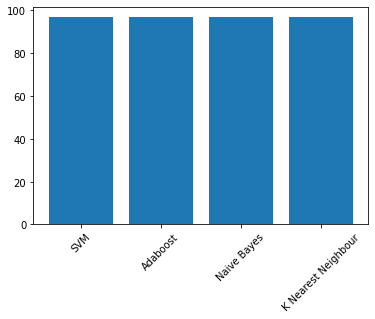

In [143]:
plt.bar(algos, accuracy)
plt.xticks(rotation = 45) 
plt.show()

# Answer 4

In [148]:
n = int(input())
f = 1
for i in range(2, n+1):
    f *= i
    
print('Factorial:', f)

4
Factorial: 24


# Thank you